In [10]:
import sys
import os

current_directory = os.getcwd()
project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import inconsistencies_util

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_to_test = df.copy()

adding 10% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.
All values in age feature are correct.
All values in age feature are correct.

TOTAL INCONSISTENCIES PERCENTAGE
(0.0,)

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 936
Percentage of inconsistencies in age and married features: 10.00%
Number of inconsistencies in age and workType features: 936
Percentage of inconsistencies in age and workType features: 10.00%
Number of abnormal values for feature age: 936
Percentage of abnormal values for feature age: 10.00%
Number of abnormal values for feature bmi: 936
Percentage of abnormal values for feature bmi: 

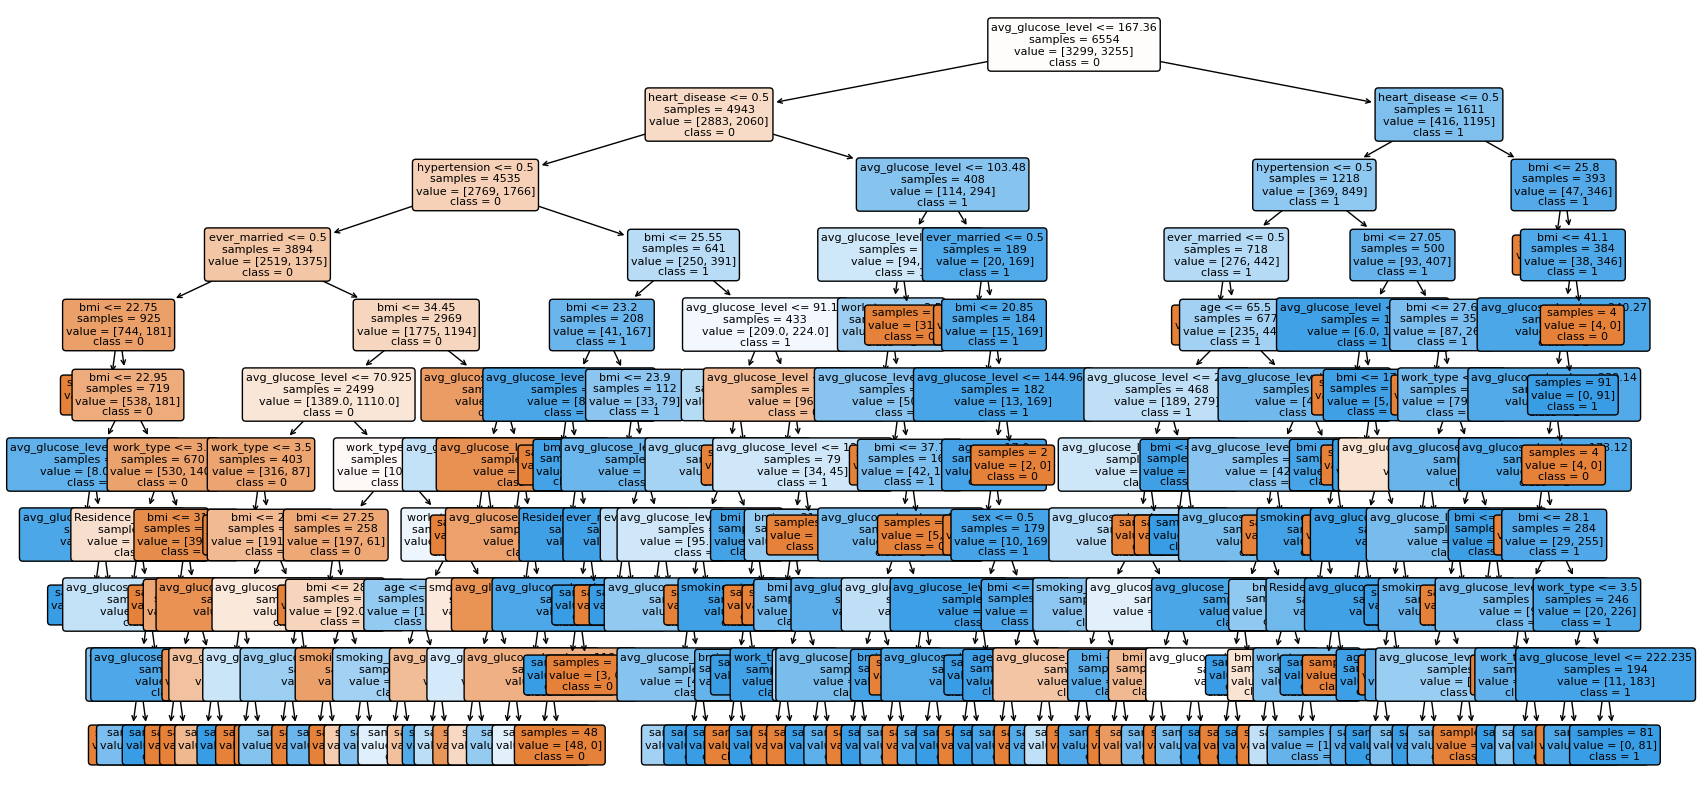

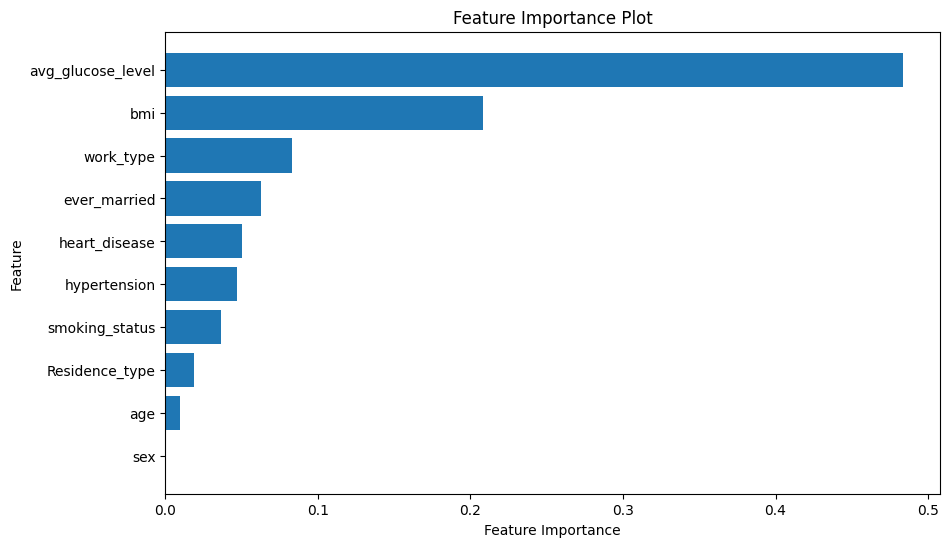

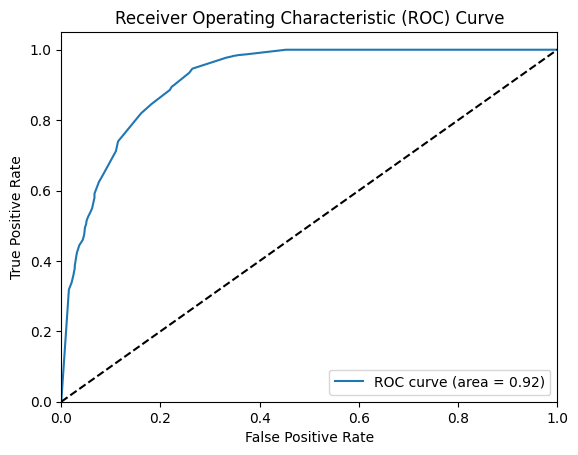

AUC Score: 0.9165213642703183


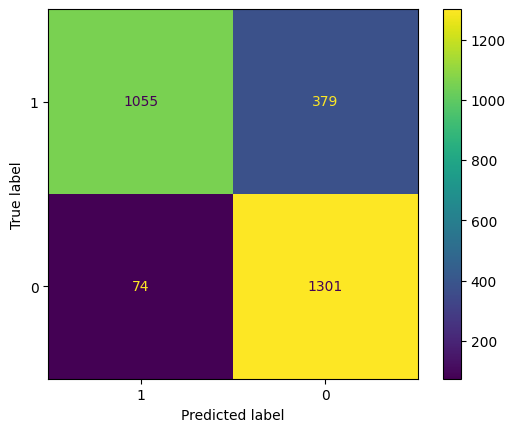

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8362989323843416, 0.8469750889679716, 0.7900355871886121, 0.8327402135231317, 0.7900355871886121, 0.7900355871886121, 0.8291814946619217, 0.797153024911032, 0.8042704626334519, 0.7964285714285714]
Mean accuracy: 0.8113154550076258
95% confidence interval: (0.7953119063495168, 0.8273190036657349)


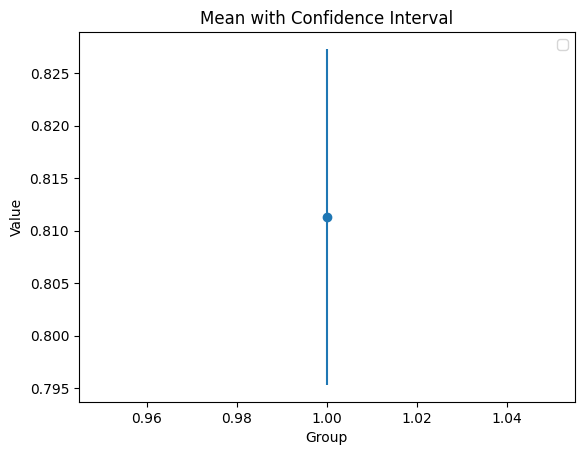


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1434
           1       0.80      0.89      0.84      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.84      0.83      0.83      2809



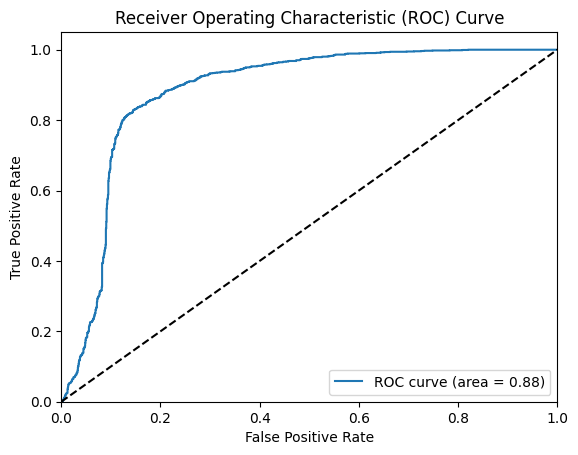

AUC Score: 0.8812907315836185


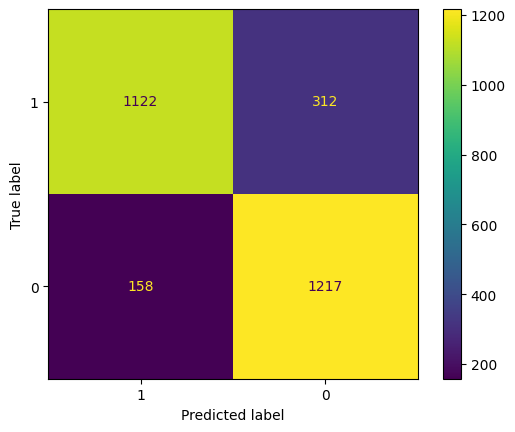


ORIGINAL VALUES RESTORED


In [2]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 10)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_10_dt, y_test_10_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_10, confidence_interval_dt_10 = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_10_svm, y_test_10_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_10, confidence_interval_svm_10 = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 30% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 936
Percentage of inconsistencies in age and married features: 10.00%
Number of inconsistencies in age and workType features: 936
Percentage of inconsistencies in age and workType features: 10.00%
Number of abnormal values for feature age: 936
Percentage of abnormal values for feature age: 10.00%
Number of abnormal values for feature bmi: 936
Percentage of abnormal values for feature bmi: 10.00%
All values in age feature are correct.

TOTAL INCONSISTENCIES PERCENTAGE
(39.9871835950016,)

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2808
Percentage of inconsistencies in age and married features: 29.99%
Number of inconsistencies in age and workType features: 2808
Percentage of inconsistencies in age and workType features: 29.99%
Number of abnormal values for feature age: 2808
Pe

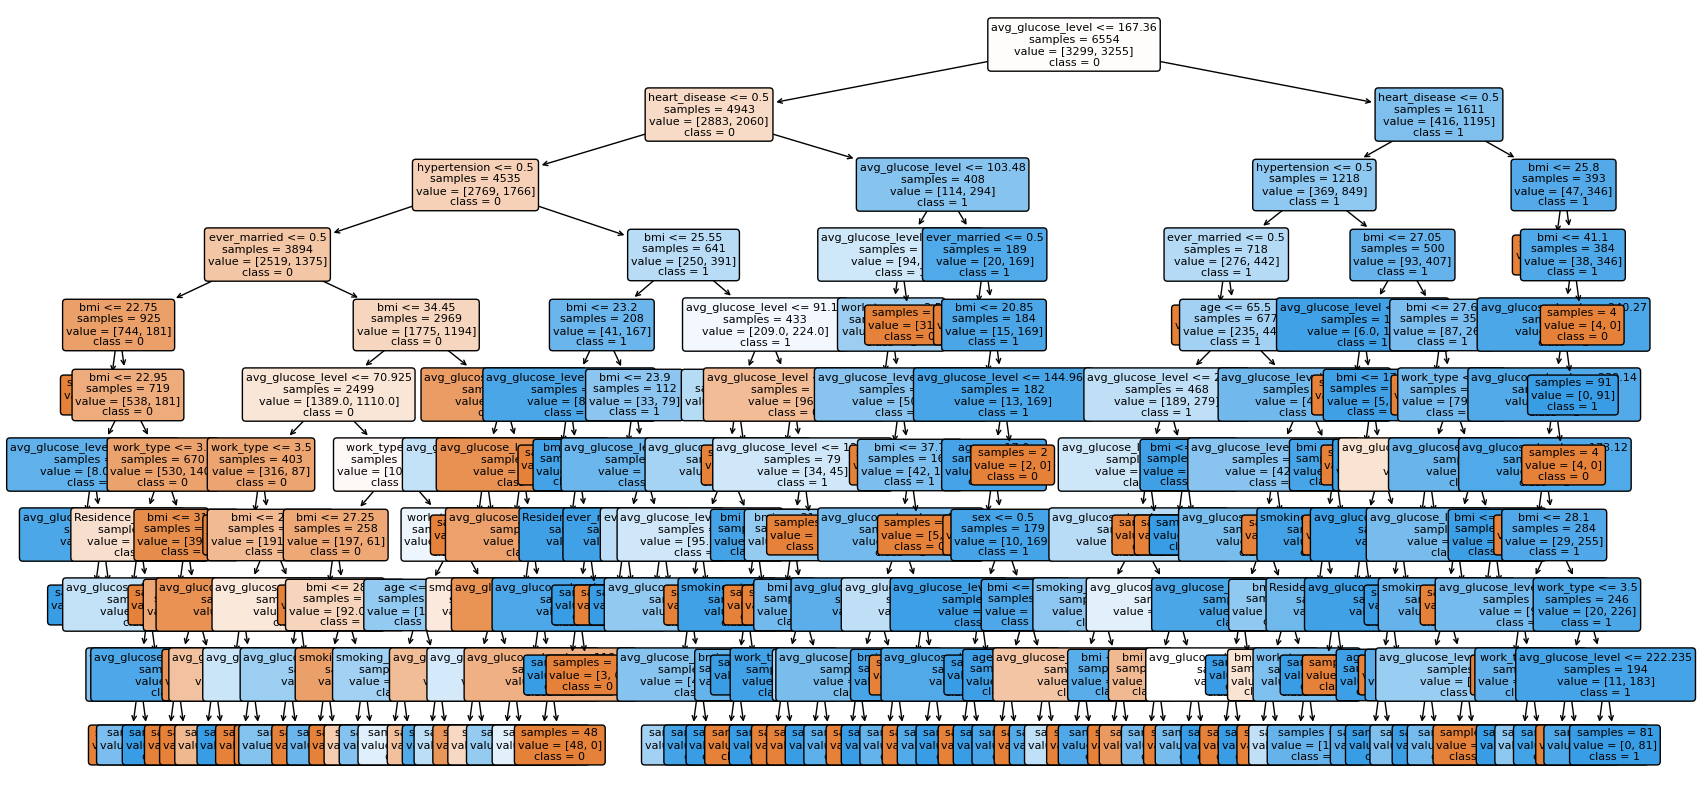

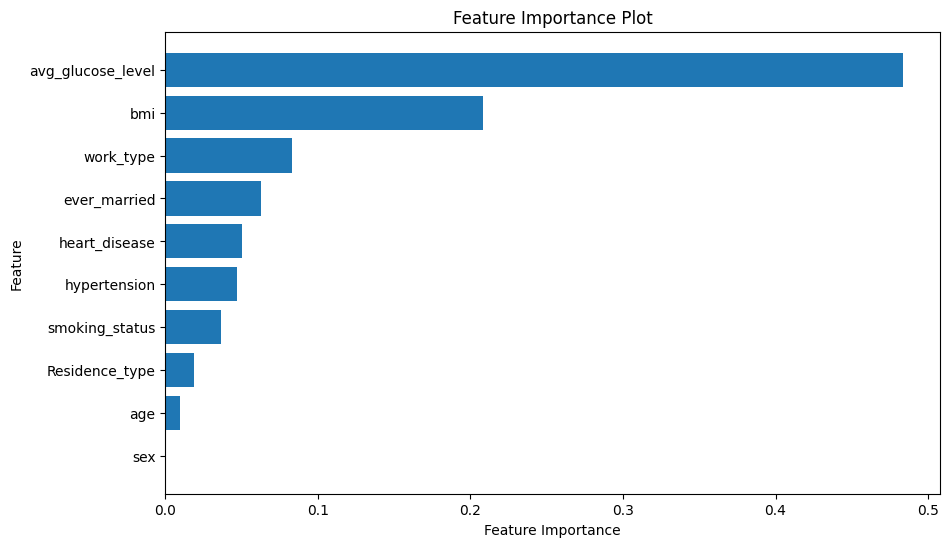

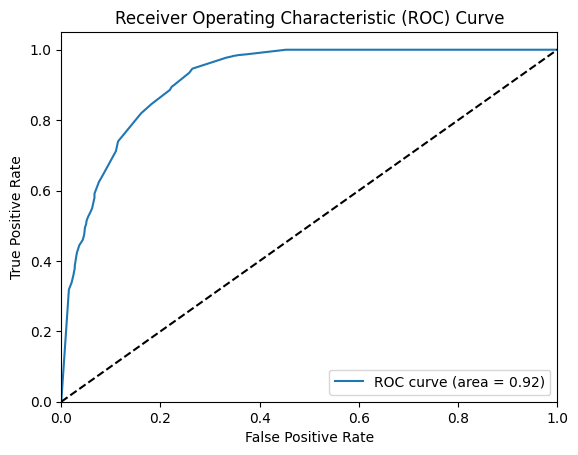

AUC Score: 0.9165213642703183


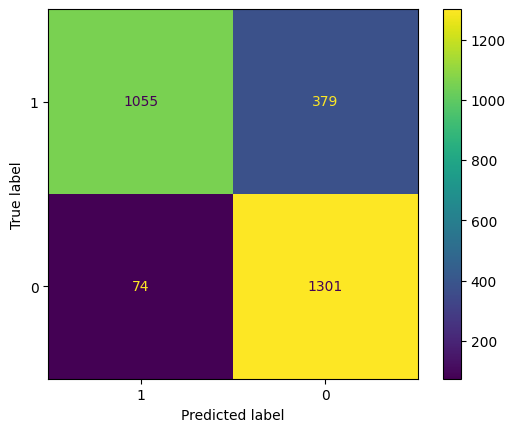

Accuracy for each fold:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 [0.800711743772242, 0.8327402135231317, 0.800711743772242, 0.8754448398576512, 0.8042704626334519, 0.8113879003558719, 0.7793594306049823, 0.8434163701067615, 0.7793594306049823, 0.8321428571428572]
Mean accuracy: 0.8159544992374175
95% confidence interval: (0.7944441322935866, 0.8374648661812484)


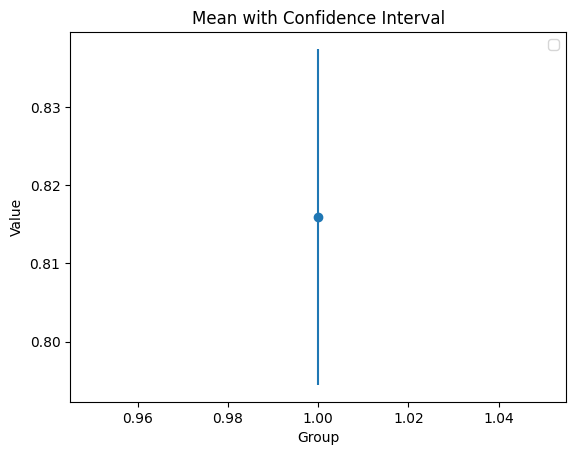


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1434
           1       0.80      0.89      0.84      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.84      0.83      0.83      2809



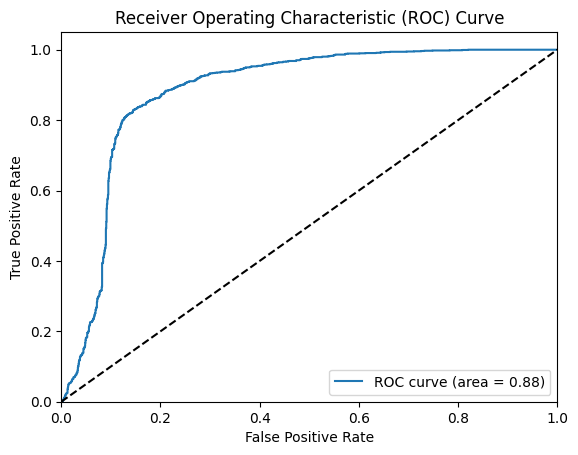

AUC Score: 0.8812907315836185


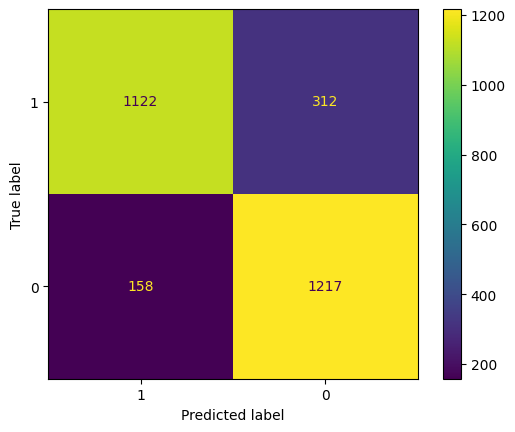


ORIGINAL VALUES RESTORED


In [3]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 30)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_30_dt, y_test_30_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_30, confidence_interval_dt_30 = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_30_svm, y_test_30_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_30, confidence_interval_svm_30 = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 50% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2808
Percentage of inconsistencies in age and married features: 29.99%
Number of inconsistencies in age and workType features: 2808
Percentage of inconsistencies in age and workType features: 29.99%
Number of abnormal values for feature age: 2808
Percentage of abnormal values for feature age: 29.99%
Number of abnormal values for feature bmi: 2808
Percentage of abnormal values for feature bmi: 29.99%
All values in age feature are correct.

TOTAL INCONSISTENCIES PERCENTAGE
(119.96155078500482,)

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 4681
Percentage of inconsistencies in age and married features: 49.99%
Number of inconsistencies in age and workType features: 4681
Percentage of inconsistencies in age and workType features: 49.99%
Number of abnormal values for feature age: 4

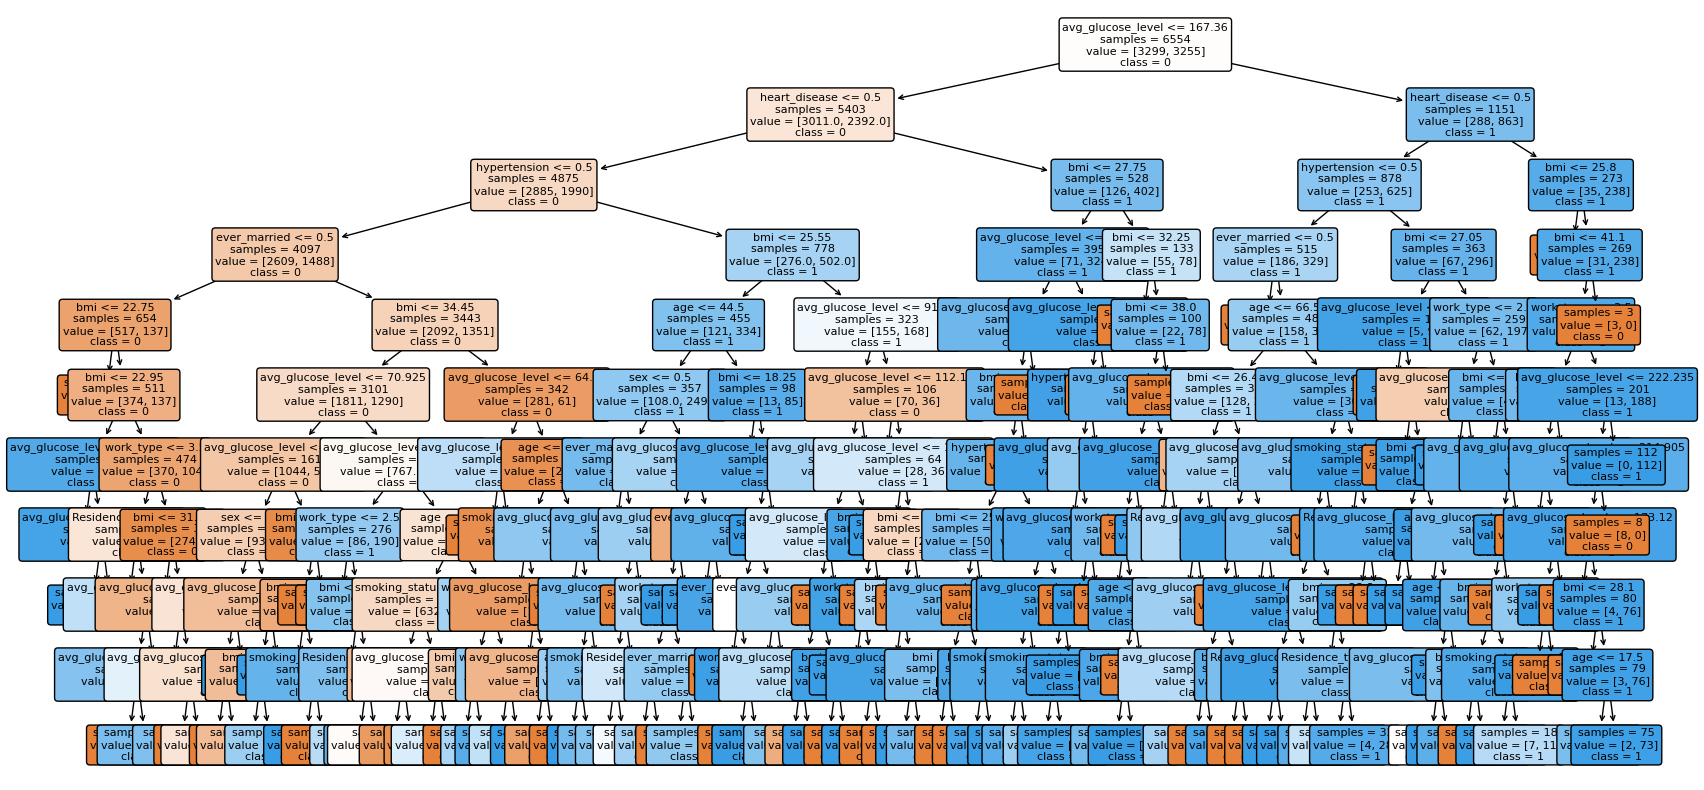

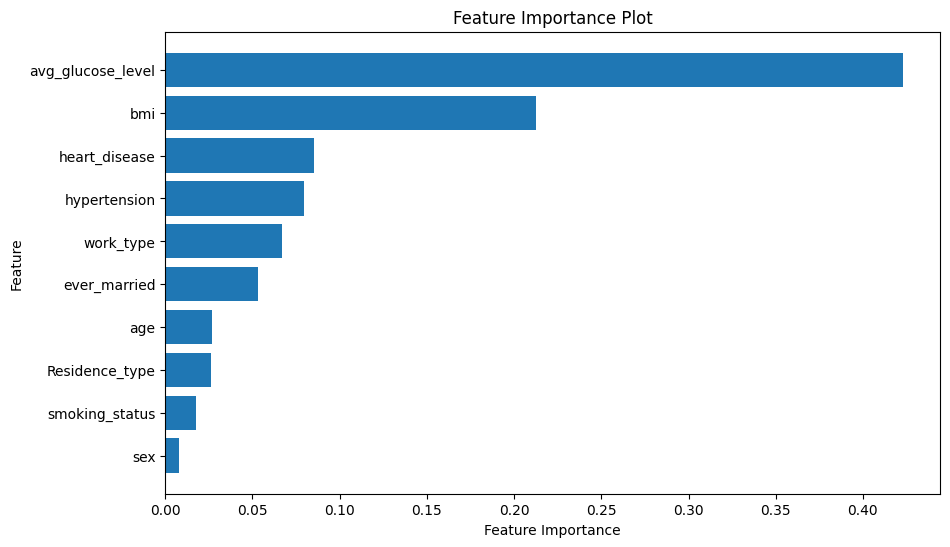

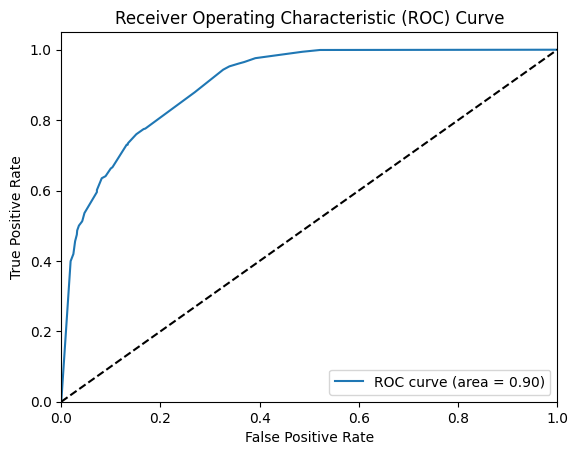

AUC Score: 0.9037306960821605


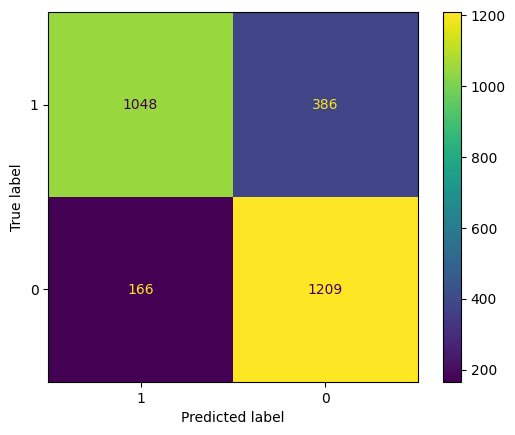

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8220640569395018, 0.8362989323843416, 0.797153024911032, 0.8042704626334519, 0.8185053380782918, 0.8683274021352313, 0.797153024911032, 0.8078291814946619, 0.8540925266903915, 0.8428571428571429]
Mean accuracy: 0.8248551093035079
95% confidence interval: (0.8071770726717982, 0.8425331459352177)


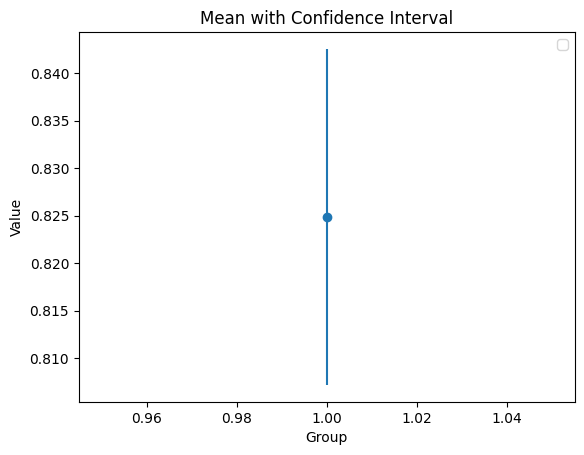


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1434
           1       0.77      0.84      0.80      1375

    accuracy                           0.80      2809
   macro avg       0.80      0.80      0.80      2809
weighted avg       0.80      0.80      0.80      2809



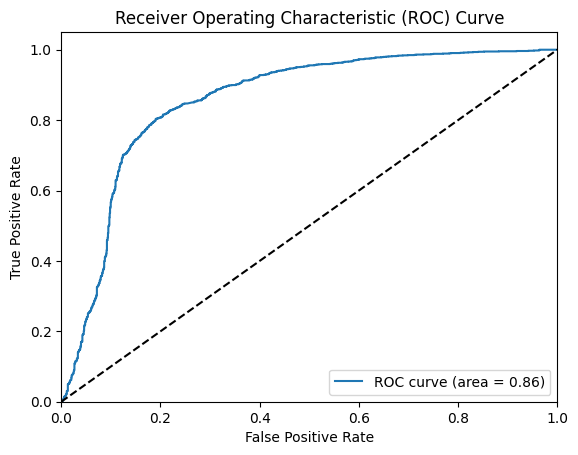

AUC Score: 0.8555805756307849


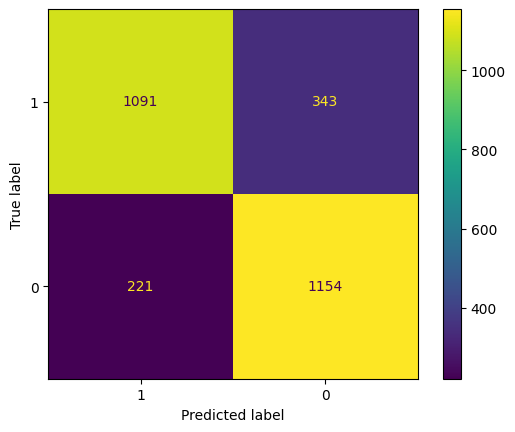


ORIGINAL VALUES RESTORED


In [4]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 50)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_50_dt, y_test_50_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_50, confidence_interval_dt_50 = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_50_svm, y_test_50_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_50, confidence_interval_svm_50 = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)  

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 100% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.
All values in age feature are correct.
All values in age feature are correct.

TOTAL INCONSISTENCIES PERCENTAGE
(0.0,)

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 9363
Percentage of inconsistencies in age and married features: 100.00%
Number of inconsistencies in age and workType features: 9363
Percentage of inconsistencies in age and workType features: 100.00%
Number of abnormal values for feature age: 9363
Percentage of abnormal values for feature age: 100.00%
Number of abnormal values for feature bmi: 9363
Percentage of abnormal values for featur

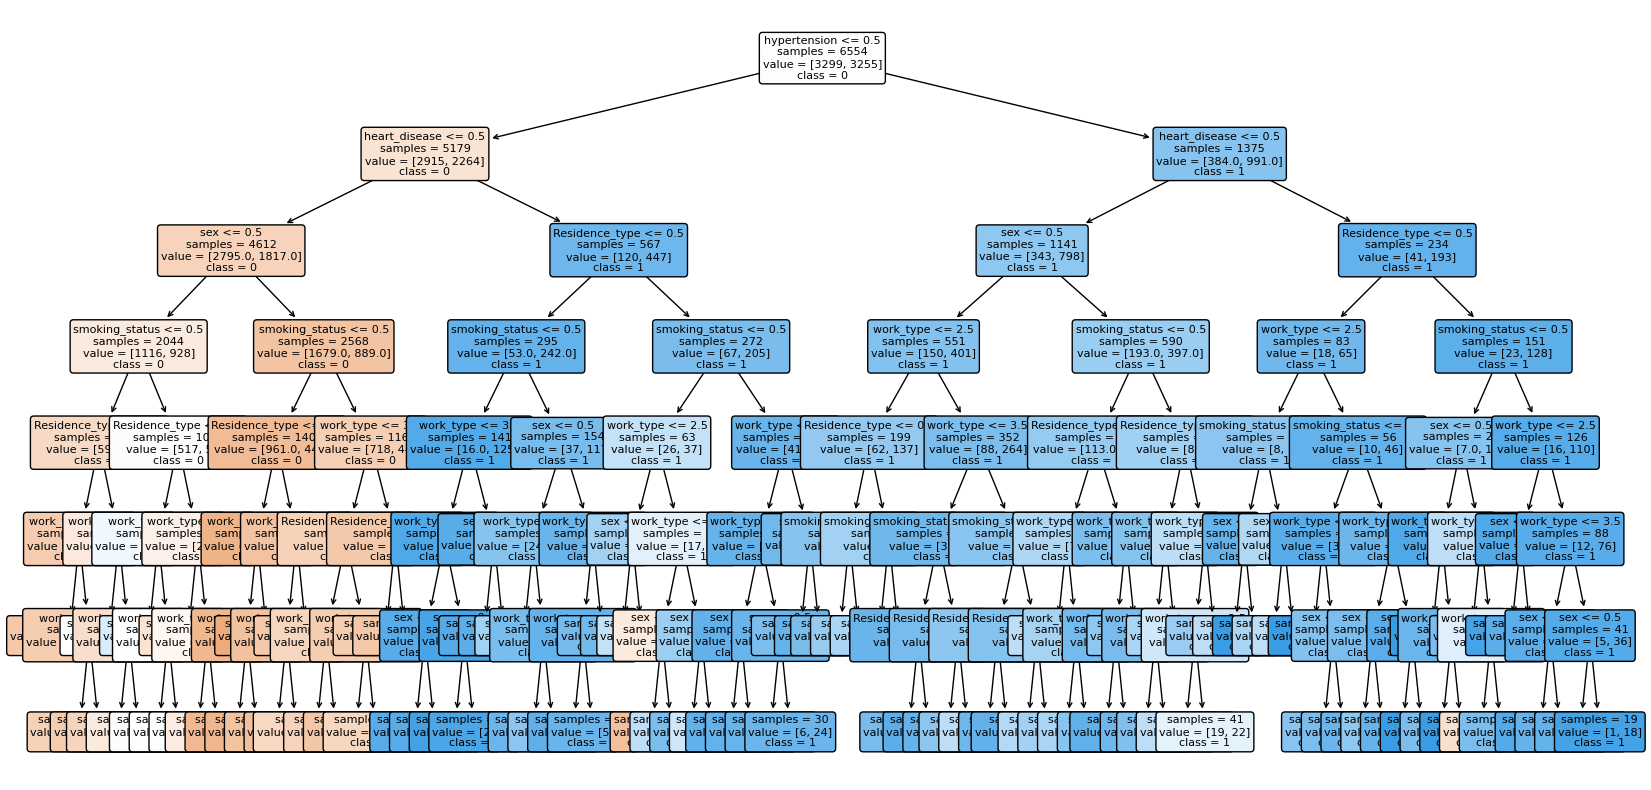

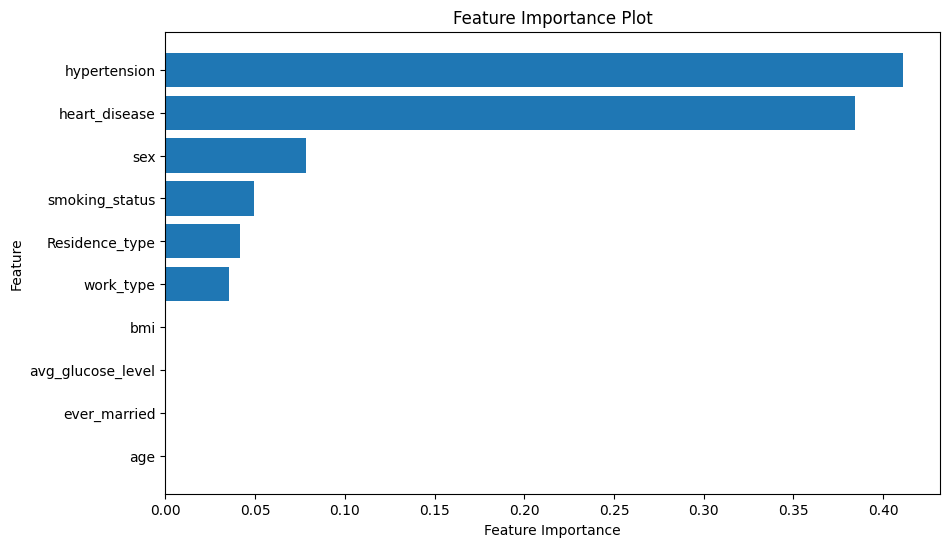

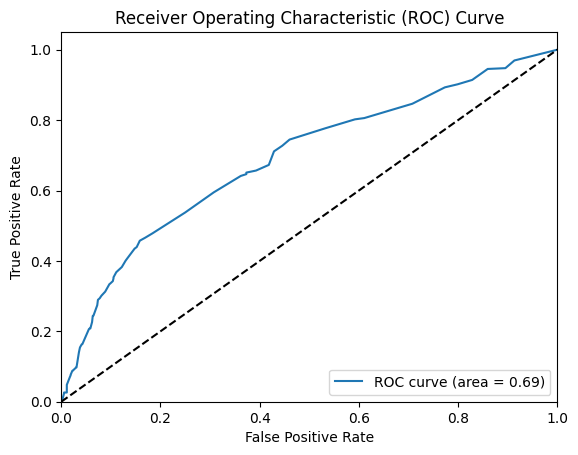

AUC Score: 0.6898978065170532


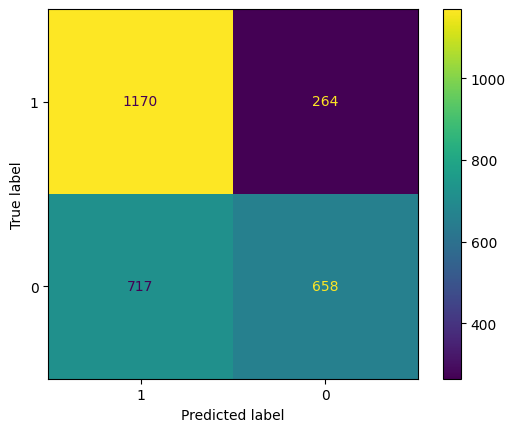

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8042704626334519, 0.8220640569395018, 0.8078291814946619, 0.8256227758007118, 0.8220640569395018, 0.8398576512455516, 0.7508896797153025, 0.8185053380782918, 0.8540925266903915, 0.8464285714285714]
Mean accuracy: 0.8191624300965937
95% confidence interval: (0.7985639123235583, 0.8397609478696292)


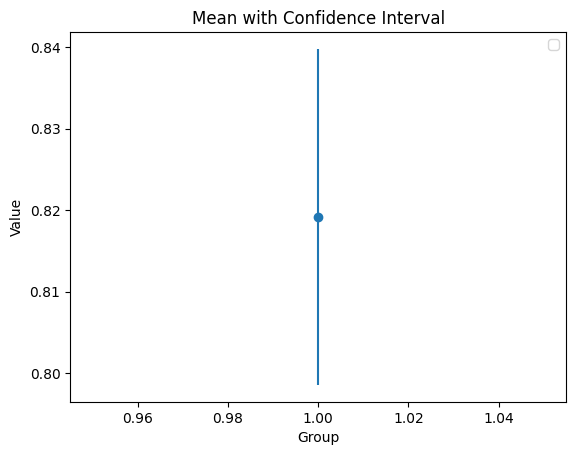


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 0.1, 'classifier__gamma': 0.1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1434
           1       0.49      1.00      0.66      1375

    accuracy                           0.49      2809
   macro avg       0.24      0.50      0.33      2809
weighted avg       0.24      0.49      0.32      2809



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

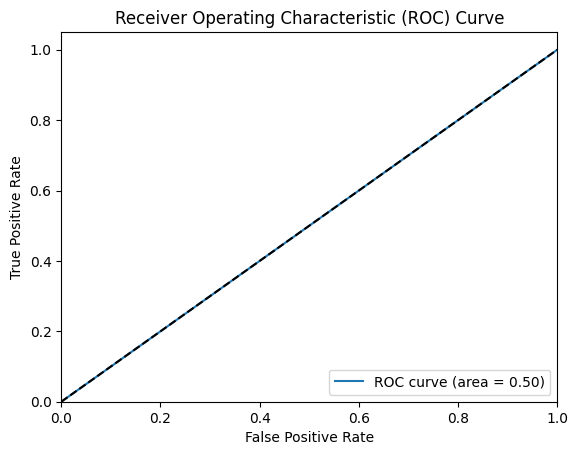

AUC Score: 0.5


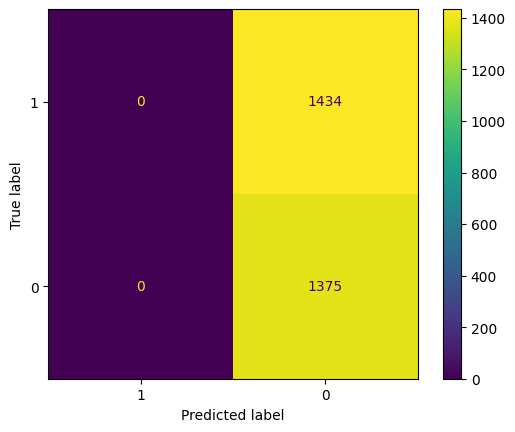


ORIGINAL VALUES RESTORED


In [11]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 100)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_100_dt, y_test_100_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_100, confidence_interval_dt_100 = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_100_svm, y_test_100_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_100, confidence_interval_svm_100 = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

Dropping inconsistencies features


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1434
           1       0.86      0.66      0.75      1375

    accuracy                           0.78      2809
   macro avg       0.80      0.78      0.78      2809
weighted avg       0.80      0.78      0.78      2809

Node Labels:
 Annotation(0.680249, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


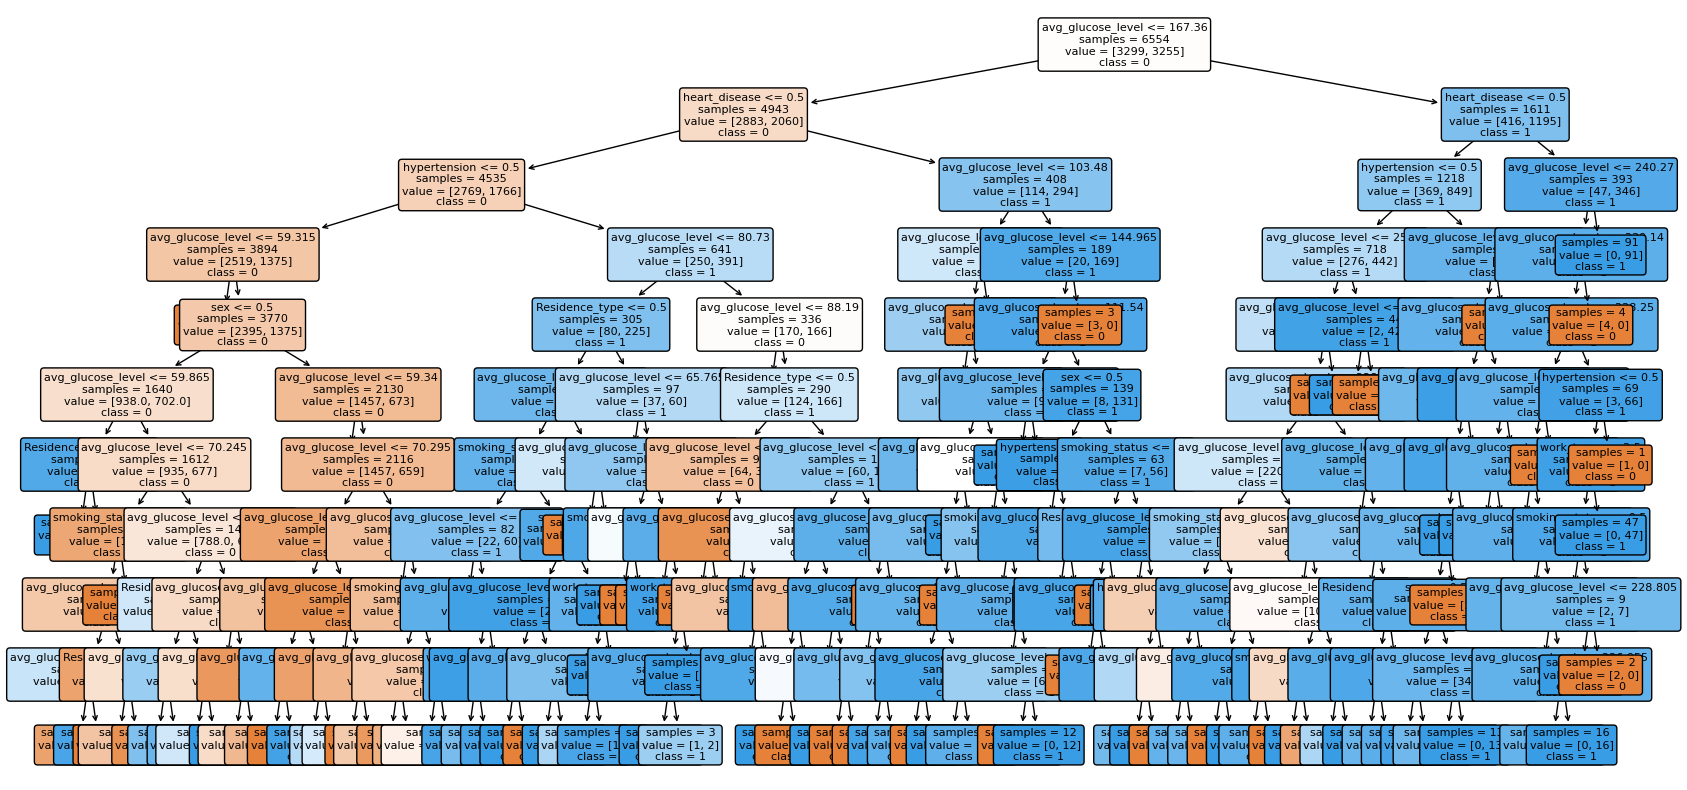

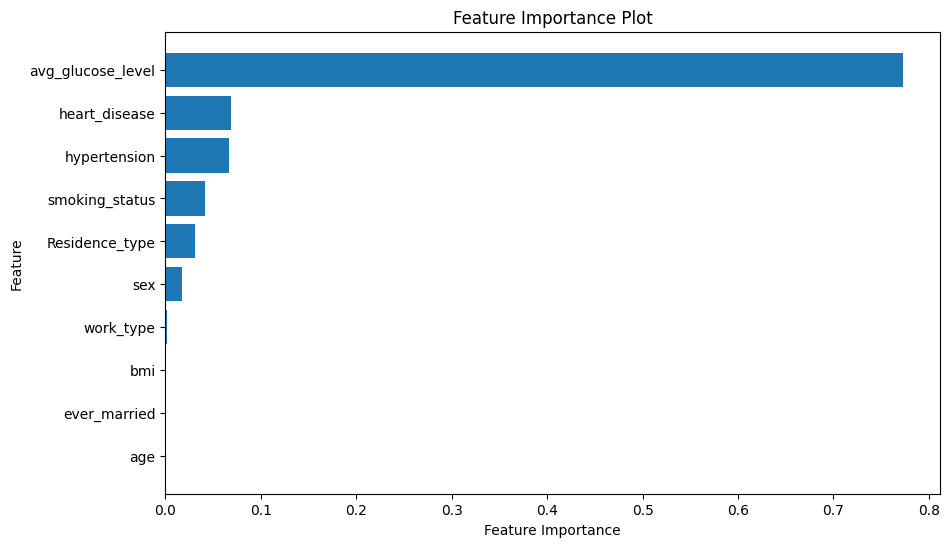

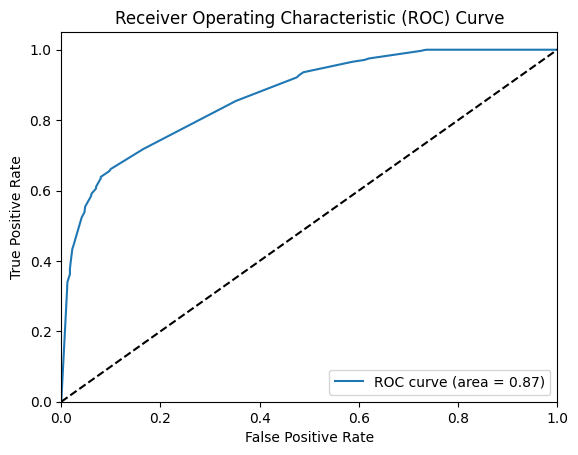

AUC Score: 0.8682647394446558


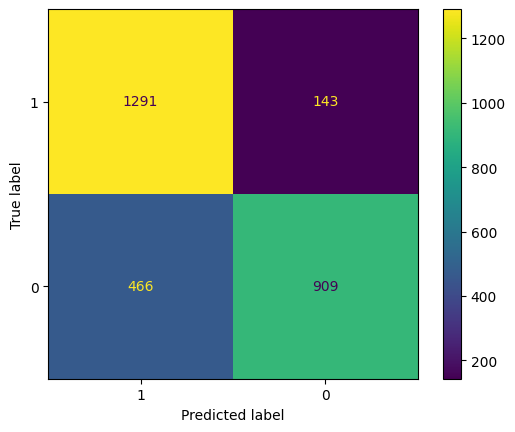

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8469750889679716, 0.7615658362989324, 0.797153024911032, 0.8220640569395018, 0.8220640569395018, 0.8220640569395018, 0.8469750889679716, 0.8149466192170819, 0.8469750889679716, 0.8071428571428572]
Mean accuracy: 0.8187925775292323
95% confidence interval: (0.7998531784688094, 0.8377319765896551)


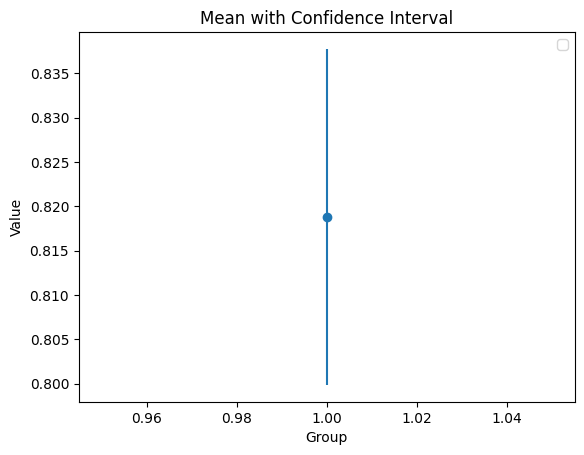


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      1434
           1       0.00      0.00      0.00      1375

    accuracy                           0.51      2809
   macro avg       0.26      0.50      0.34      2809
weighted avg       0.26      0.51      0.35      2809



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

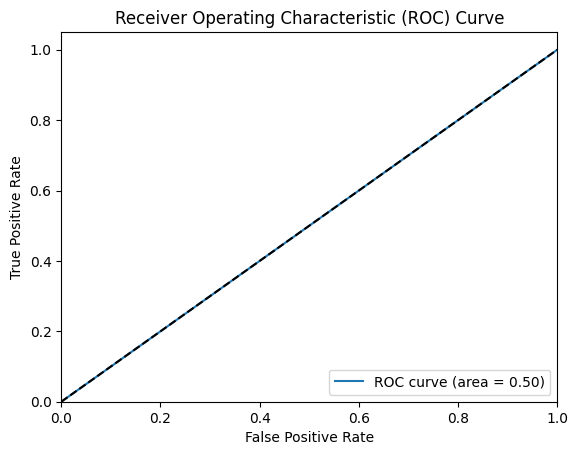

AUC Score: 0.5


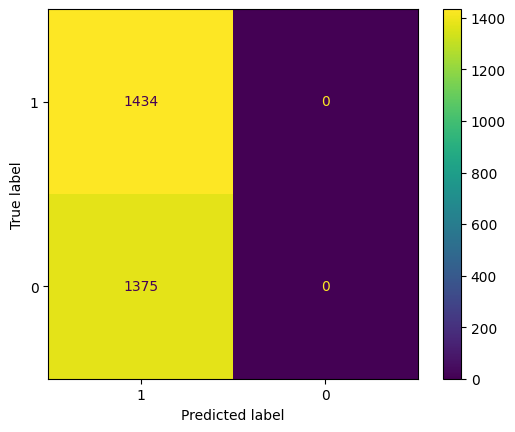

In [6]:
# Drop the columns from the training data
df_train = df.drop(['age', 'work_type', 'ever_married'], axis=1)

# Drop the columns from the test data
df_test = df_to_test.drop(['age', 'work_type', 'ever_married'], axis=1)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_drop_dt, y_test_drop_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_drop, confidence_interval_dt_drop = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_drop_svm, y_test_drop_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_drop, confidence_interval_svm_drop = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

## Conclusion

### ROC CURVE - Decision Tree

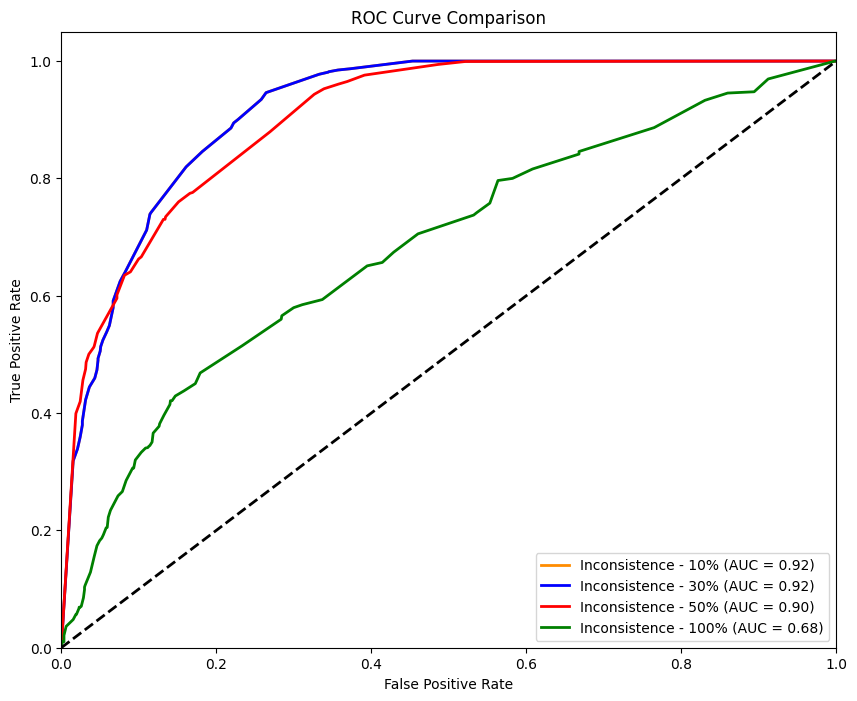

In [7]:
roc_results = [
    (y_pred_prob_10_dt, y_test_10_dt, 'Inconsistence - 10%'),
    (y_pred_prob_30_dt, y_test_30_dt, 'Inconsistence - 30%'),
    (y_pred_prob_50_dt, y_test_50_dt, 'Inconsistence - 50%'),
    (y_pred_prob_100_dt, y_test_100_dt, 'Inconsistence - 100%')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### ROC Curve - Support Vector Machine

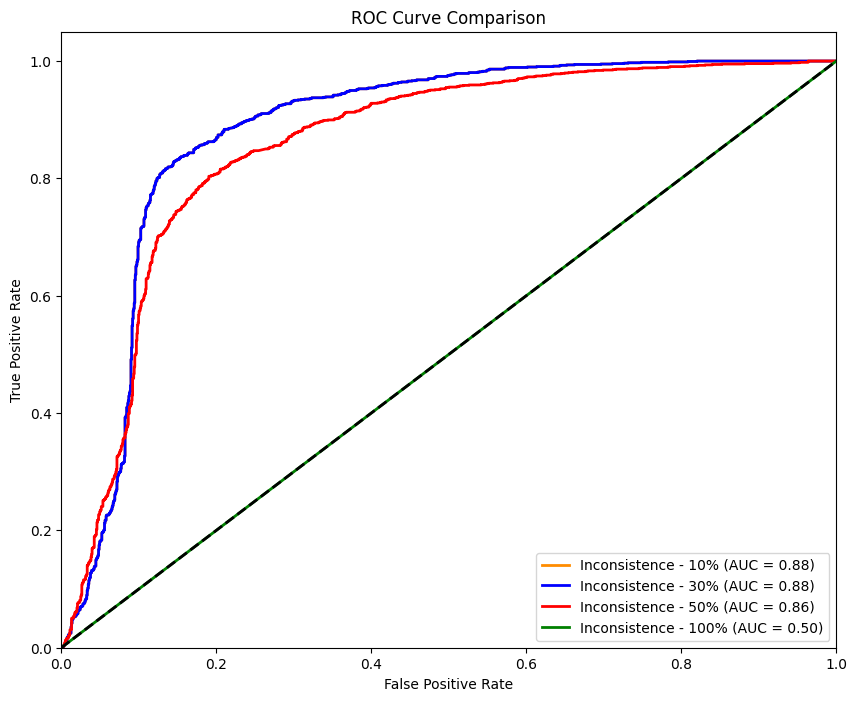

In [8]:
roc_results = [
    (y_pred_prob_10_svm, y_test_10_svm, 'Inconsistence - 10%'),
    (y_pred_prob_30_svm, y_test_30_svm, 'Inconsistence - 30%'),
    (y_pred_prob_50_svm, y_test_50_svm, 'Inconsistence - 50%'),
    (y_pred_prob_100_svm, y_test_100_svm, 'Inconsistence - 100%')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval - Decision Tree

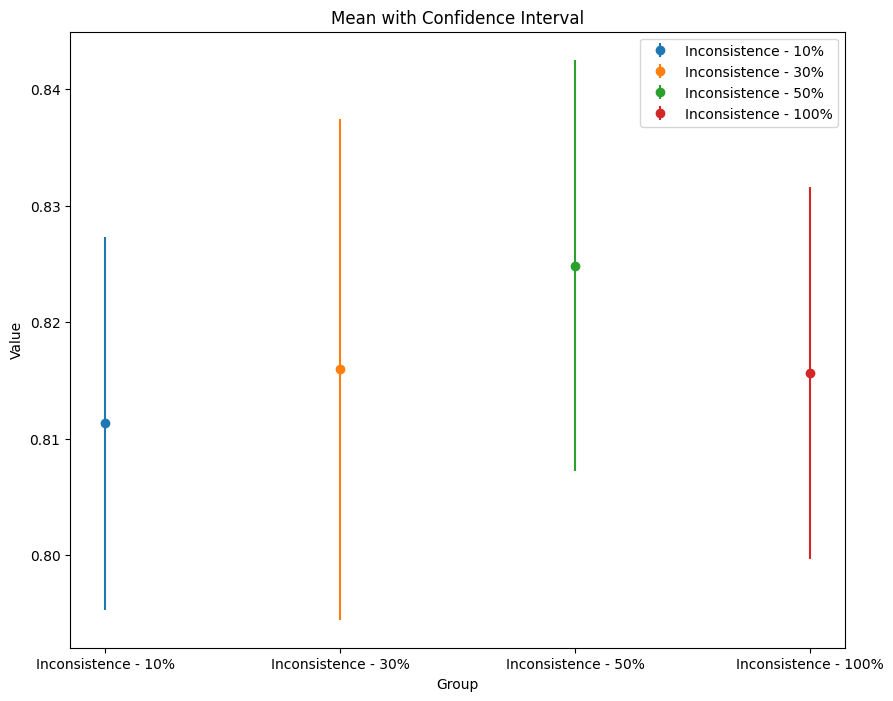

In [9]:
model_results = [
    ('Inconsistence - 10%', mean_accuracy_dt_10, confidence_interval_dt_10),
    ('Inconsistence - 30%', mean_accuracy_dt_30, confidence_interval_dt_30),
    ('Inconsistence - 50%', mean_accuracy_dt_50, confidence_interval_dt_50),
    ('Inconsistence - 100%', mean_accuracy_dt_100, confidence_interval_dt_100)
]
ML_algorithms.plot_confidence_intervals(model_results)